### **Preparation**


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import csv
from collections import deque
from google.colab import files

### **Input Data**
load the training data file
each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$  
$x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

In [2]:
uploaded = files.upload()

Saving mnist_test.csv to mnist_test.csv


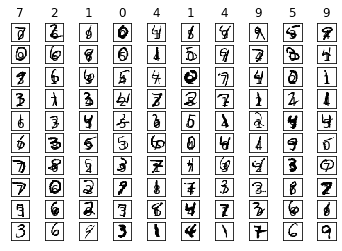

784
[0. 0. 0. ... 0. 0. 0.]
10000
784
10000
784


In [20]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)   #10000개
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)   #784 * 10000 matrix
list_label  = np.empty(num_image, dtype=int)                            #10000 vector

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()
print(len(list_image[:,2])) #784
print(list_image[0])
print(len(list_image[1])) #10000
print(len(list_image))    #784
print(num_image)          #10000
print(len(im_vector))     #784

### **Average Image for Each Digit**

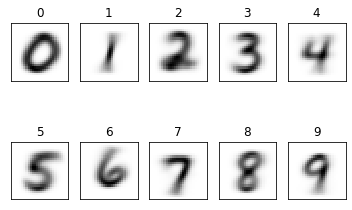

In [29]:
avg_image = np.zeros([784,10])
avg_label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in range(0, 10000):
  index = list_label[i] #index를 할당
  avg_image[:,index] += list_image[:, i] / 256

##출력부분
for i in range(10):
    label       = avg_label[i]
    im_vector   = avg_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

### **Forward Propagation with Random Weights**

In [0]:
def sigmoid(x):
  result = 1/(1 + np.exp(-x))
  return result

In [0]:
def forward(theta, x):
  result = np.dot(x, theta)
  return result

In [41]:
mu = 0
sigma = 1
thetas = np.random.normal(mu, sigma, 784)   #theta 784개 생성
forward_avg = np.zeros(10)      #label 별 forward값 저장
forward_count = np.zeros(10)    #label 갯수 세기

for i in range(0, 10000):
  index = list_label[i]
  forward_count[index] += 1
  y = forward(thetas, list_image[:,i])
  z = sigmoid(y)
  forward_avg[index] += z
for i in range(0, 10):
  forward_avg[i] /= forward_count[i]

#출력부분
print(forward_avg)
  

[0.26276189 0.0960405  0.24515823 0.25400212 0.76365553 0.26815705
 0.60442265 0.4248789  0.41855764 0.46150374]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


### **1. Plot the training data**

### **2. Plotting the Training Error with Regularizations**